# Flight Delays


###Installing Dependencies


In [ ]:
!pip install tensorflow
!pip install pydotplus
!pip install tensorflow_decision_forests
!pip install matplotlib
!pip install keras-tuner==1.0.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.7/319.7 kB 22.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.6
    Uninstalling protobuf-4.25.6:
      Successfully uninstalled protobuf-4.25.6
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 344.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 36.7 MB/s eta 0:00:00


In [ ]:
# install the dependencies
# Python ≥3.5 is required

import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


import tensorflow as tf
from tensorflow import keras

# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

import time
import tensorflow_decision_forests as tfdf

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

from IPython.display import clear_output

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
import logging
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.metrics import f1_score
from six import StringIO
import pydotplus
from IPython.display import Image
dot_data = StringIO()
from sklearn import tree
import xgboost as xgb
from xgboost import XGBClassifier, plot_tree
from tensorflow.keras.layers import Dropout
from keras.callbacks import EarlyStopping
from matplotlib import pyplot

import datetime, warnings, scipy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
from collections import OrderedDict
from matplotlib.gridspec import GridSpec
from sklearn import metrics, linear_model
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from scipy.optimize import curve_fit
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
pd.options.display.max_columns = 50
%matplotlib inline
warnings.filterwarnings("ignore")



os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # FATAL
logging.getLogger('tensorflow').setLevel(logging.FATAL)





###Class made for Plotting Graphs

In [ ]:
class Figure_style():
    #_________________________________________________________________
    def __init__(self, size_x = 11, size_y = 5, nrows = 1, ncols = 1):
        sns.set_style("white")
        sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})
        self.fig, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize=(size_x,size_y,))
        #________________________________
        # convert self.axs to 2D array
        if nrows == 1 and ncols == 1:
            self.axs = np.reshape(axs, (1, -1))
        elif nrows == 1:
            self.axs = np.reshape(axs, (1, -1))
        elif ncols == 1:
            self.axs = np.reshape(axs, (-1, 1))
    #_____________________________
    def pos_update(self, ix, iy):
        self.ix, self.iy = ix, iy
    #_______________
    def style(self):
        self.axs[self.ix, self.iy].spines['right'].set_visible(False)
        self.axs[self.ix, self.iy].spines['top'].set_visible(False)
        self.axs[self.ix, self.iy].yaxis.grid(color='lightgray', linestyle=':')
        self.axs[self.ix, self.iy].xaxis.grid(color='lightgray', linestyle=':')
        self.axs[self.ix, self.iy].tick_params(axis='both', which='major',
                                               labelsize=10, size = 5)
    #________________________________________
    def draw_legend(self, location='upper right'):
        legend = self.axs[self.ix, self.iy].legend(loc = location, shadow=True,
                                        facecolor = 'g', frameon = True)
        legend.get_frame().set_facecolor('whitesmoke')
    #_________________________________________________________________________________
    def cust_plot(self, x, y, color='b', linestyle='-', linewidth=1, marker=None, label=''):
        if marker:
            markerfacecolor, marker, markersize = marker[:]
            self.axs[self.ix, self.iy].plot(x, y, color = color, linestyle = linestyle,
                                linewidth = linewidth, marker = marker, label = label,
                                markerfacecolor = markerfacecolor, markersize = markersize)
        else:
            self.axs[self.ix, self.iy].plot(x, y, color = color, linestyle = linestyle,
                                        linewidth = linewidth, label=label)
        self.fig.autofmt_xdate()
    #________________________________________________________________________
    def cust_plot_date(self, x, y, color='lightblue', linestyle='-',
                       linewidth=1, markeredge=False, label=''):
        markeredgewidth = 1 if markeredge else 0
        self.axs[self.ix, self.iy].plot_date(x, y, color='lightblue', markeredgecolor='grey',
                                  markeredgewidth = markeredgewidth, label=label)
    #________________________________________________________________________
    def cust_scatter(self, x, y, color = 'lightblue', markeredge = False, label=''):
        markeredgewidth = 1 if markeredge else 0
        self.axs[self.ix, self.iy].scatter(x, y, color=color,  edgecolor='grey',
                                  linewidths = markeredgewidth, label=label)
    #___________________________________________
    def set_xlabel(self, label, fontsize = 14):
        self.axs[self.ix, self.iy].set_xlabel(label, fontsize = fontsize)
    #___________________________________________
    def set_ylabel(self, label, fontsize = 14):
        self.axs[self.ix, self.iy].set_ylabel(label, fontsize = fontsize)
    #____________________________________
    def set_xlim(self, lim_inf, lim_sup):
        self.axs[self.ix, self.iy].set_xlim([lim_inf, lim_sup])
    #____________________________________
    def set_ylim(self, lim_inf, lim_sup):
        self.axs[self.ix, self.iy].set_ylim([lim_inf, lim_sup])

### Loading the dataset


In [ ]:
# load the dataset
dataset_url = "https://raw.githubusercontent.com/RonitPG19/FlightPrediction/main/Dataset/flights_data.csv"

# For NNs
df = pd.read_csv(dataset_url)

# For gradient boosted model
df1 = df.copy()

# look at the headers
data_top = df1.head()
data_top

df3=df.copy()

### Data Exploration


MAXIMUM DELAY:  991.0
MINIMUM DELAY:  0.0
AVERAGE DELAY:  6.339243658401212


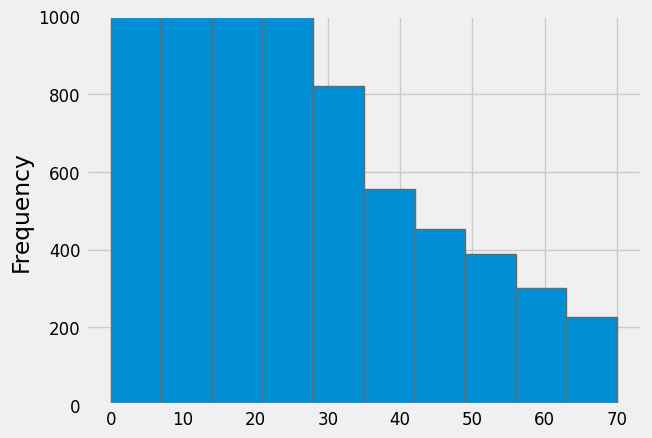

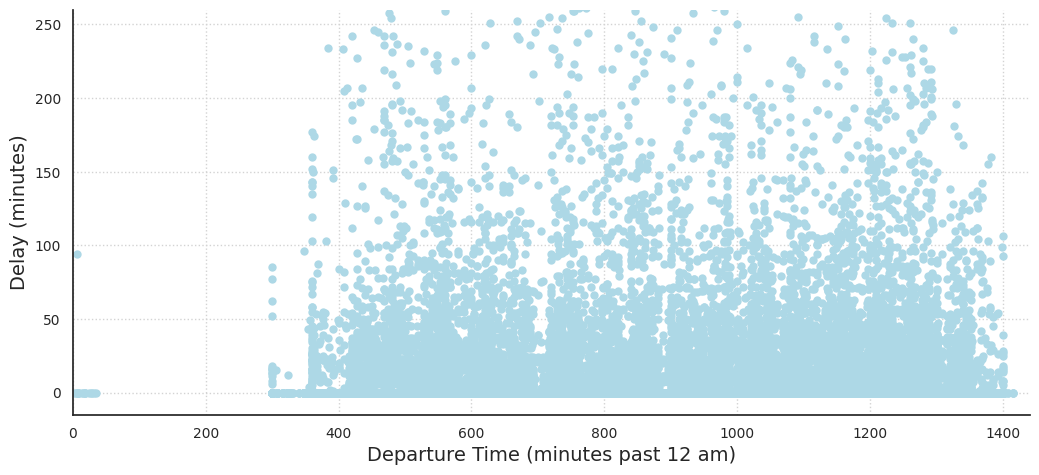

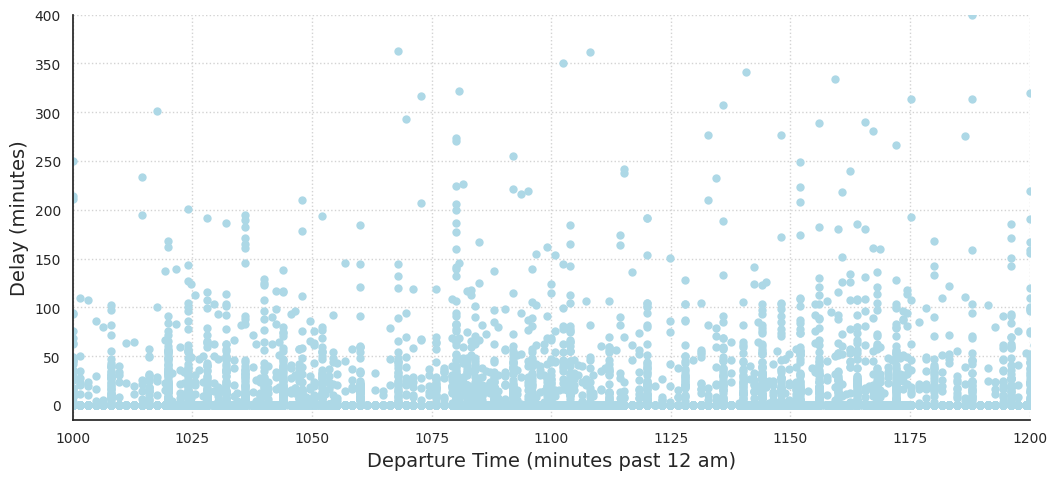

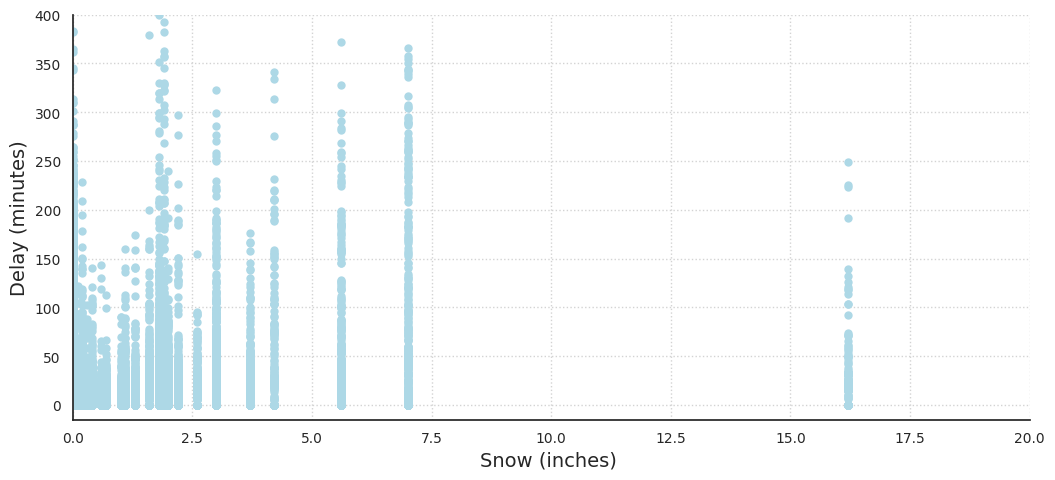

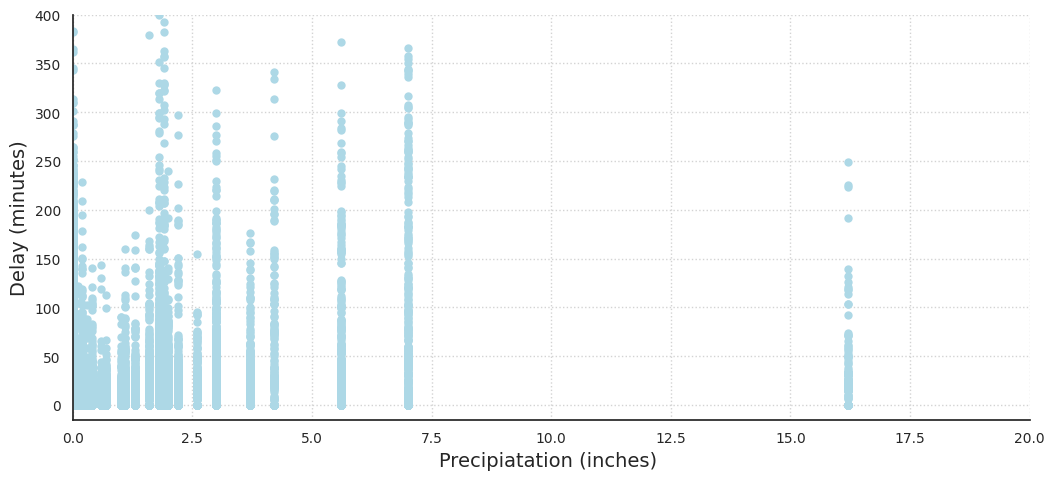

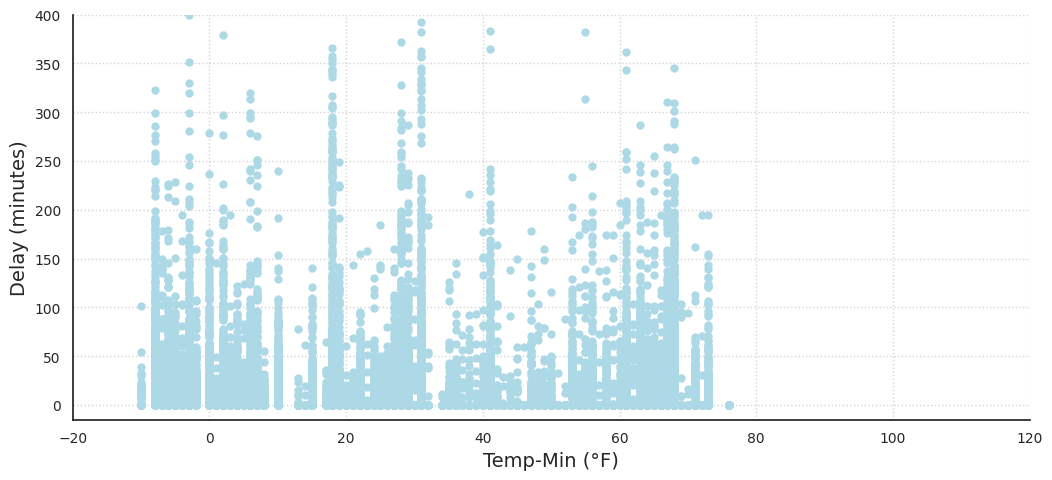

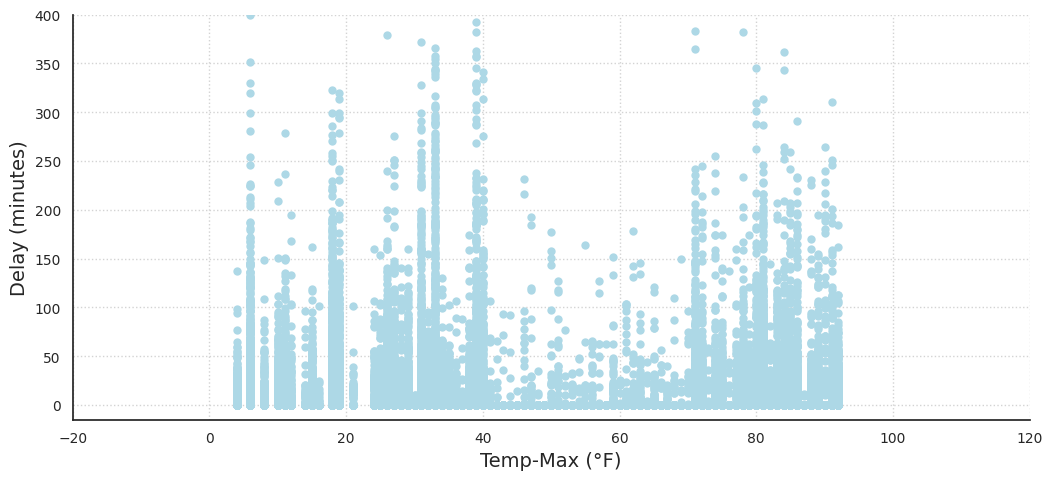

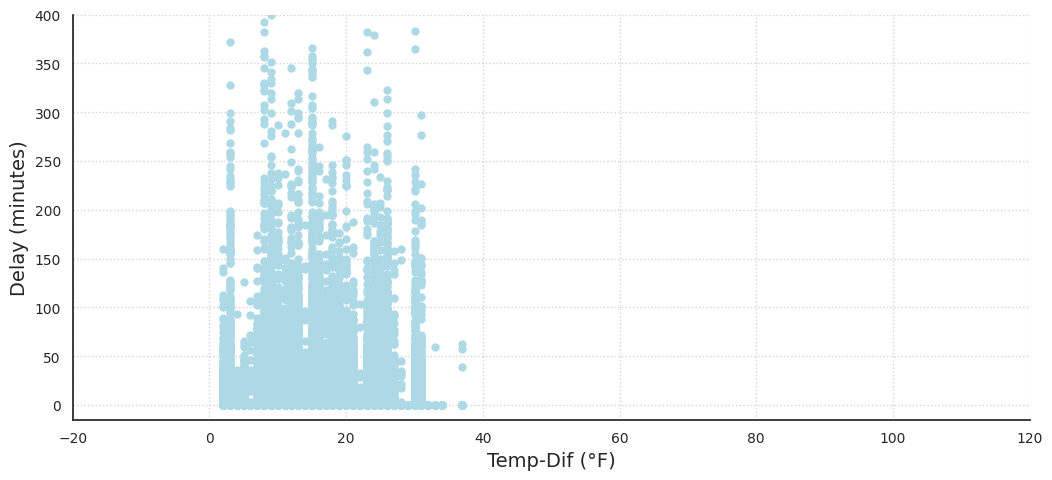

In [ ]:
# Check how complete the data is (aka % not NaN)
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(df.shape[0]-missing_df['missing values'])/df.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)


# Clean data to remove Nan values
df = df.dropna()
df = df.reset_index(drop=True)

#Take a look at average weather delay times and their distribution in this dataset
df["WEATHER_DELAY"].plot(kind="hist", range=[0, 70], ylim = (0,1000))
print("MAXIMUM DELAY: ", df["WEATHER_DELAY"].max())
print("MINIMUM DELAY: ", df["WEATHER_DELAY"].min())
print("AVERAGE DELAY: ", df["WEATHER_DELAY"].mean(skipna = True))

# Lets take a look to see how time of day effects the delays in the dataset

# convert scheduled departure to minutes past 12 am
df['SCHEDULED_DEPARTURE'] = df['SCHEDULED_DEPARTURE'].map(lambda a : (a % 100) + ((a/100)*60) )

fig1 = Figure_style(11, 5, 1, 1)
fig1.pos_update(0, 0)
fig1.cust_scatter(df['SCHEDULED_DEPARTURE'], df['WEATHER_DELAY'], label='o')
fig1.style()
fig1.set_ylabel('Delay (minutes)', fontsize = 14)
fig1.set_xlabel('Departure Time (minutes past 12 am)', fontsize = 14)
fig1.set_xlim(0, 1440)
fig1.set_ylim(-15, 260)

# This looks interesting, the peak delays seem to have a trace of some patern
# lets look closer 1000 and 1200
fig2 = Figure_style(11, 5, 1, 1)
fig2.pos_update(0, 0)
fig2.cust_scatter(df['SCHEDULED_DEPARTURE'], df['WEATHER_DELAY'], label='o')
fig2.style()
fig2.set_ylabel('Delay (minutes)', fontsize = 14)
fig2.set_xlabel('Departure Time (minutes past 12 am)', fontsize = 14)
fig2.set_xlim(1000, 1200)
fig2.set_ylim(-15, 400)

# Ok looks like it could be represented by a function

# Lets look at Delays due to Snow and Precipiatation

fig3 = Figure_style(11, 5, 1, 1)
fig3.pos_update(0, 0)
fig3.cust_scatter(df['SNOW'], df['WEATHER_DELAY'], label='o')
fig3.style()
fig3.set_ylabel('Delay (minutes)', fontsize = 14)
fig3.set_xlabel('Snow (inches) ', fontsize = 14)
fig3.set_xlim(0, 20)
fig3.set_ylim(-15, 400)

fig4 = Figure_style(11, 5, 1, 1)
fig4.pos_update(0, 0)
fig4.cust_scatter(df['SNOW'], df['WEATHER_DELAY'], label='o')
fig4.style()
fig4.set_ylabel('Delay (minutes)', fontsize = 14)
fig4.set_xlabel('Precipiatation (inches) ', fontsize = 14)
fig4.set_xlim(0, 20)
fig4.set_ylim(-15, 400)

# Let's look at temp
fig5 = Figure_style(11, 5, 1, 1)
fig5.pos_update(0, 0)
fig5.cust_scatter(df['TMIN'], df['WEATHER_DELAY'], label='o')
fig5.style()
fig5.set_ylabel('Delay (minutes)', fontsize = 14)
fig5.set_xlabel('Temp-Min (°F)', fontsize = 14)
fig5.set_xlim(-20, 120)
fig5.set_ylim(-15, 400)

# INTERESTING SEEMS LIKE A PARABOLA LIKE SHAPE
fig6 = Figure_style(11, 5, 1, 1)
fig6.pos_update(0, 0)
fig6.cust_scatter(df['TMAX'], df['WEATHER_DELAY'], label='o')
fig6.style()
fig6.set_ylabel('Delay (minutes)', fontsize = 14)
fig6.set_xlabel('Temp-Max (°F)', fontsize = 14)
fig6.set_xlim(-20, 120)
fig6.set_ylim(-15, 400)

# SAME HERE
fig7 = Figure_style(11, 5, 1, 1)
fig7.pos_update(0, 0)
fig7.cust_scatter(df['TMAX'] - df['TMIN'] , df['WEATHER_DELAY'], label='o')
fig7.style()
fig7.set_ylabel('Delay (minutes)', fontsize = 14)
fig7.set_xlabel('Temp-Dif (°F)', fontsize = 14)
fig7.set_xlim(-20, 120)
fig7.set_ylim(-15, 400)




### Data Preprocessing
We must process the data differently for NN and for our tree based models.

For the NNs, we will one-hot the categorical data such as the location of the flight and the name of the airport it is flying to. Our `y` (the WEATHER_DELAYs) need to be separated out from the input `X` and then classified into 9 classes, which are time brackets. Then we split the data into our training, validation, and test sets.

For the trees, we specify the target variable using `label` and there is no need so separate it out. We classify `y` into 9 separate classes, just as we did for the NNs. Then We create 2 different traininging, validation, and test sets. One set will be used by the Gradient Boosted Tree model and the other will be used by the Random Forest Model. A different ratio is needed for the Random Forest model because it takes a long time to run.

In [ ]:
# DATA PREPROCESSING

##################### For NN ####################################
def OneHot(df, name):
  df["DESTINATION_AIRPORT"] = df["DESTINATION_AIRPORT"].astype('category')
  df['Gen_new'] = df["DESTINATION_AIRPORT"].cat.codes
  df["AIRLINE"] = df["AIRLINE"].astype('category')
  df['Air_new'] = df["AIRLINE"].cat.codes
  # Create an instance of One-hot-encoder
  enc = OneHotEncoder()

# Passing encoded columns
  enc_data = pd.DataFrame(enc.fit_transform(
    df[['Gen_new','Air_new']]).toarray())

  # Merge with main
  New_df = df.join(enc_data)
  New_df = New_df.drop("Gen_new", axis='columns')
  New_df = New_df.drop("DESTINATION_AIRPORT", axis='columns')
  New_df = New_df.drop("Air_new", axis='columns')
  New_df = New_df.drop("AIRLINE", axis='columns')
  return New_df


# drop the first column, which is just an enumeration
df.drop(columns=df.columns[0], axis=1,  inplace=True)

# this helper function classsifies the delays into 9 different classes
def classify_delays(dt):
    if(dt < 1):
        return 0
    elif(dt < 4):
        return 1
    elif(dt < 11):
        return 2
    elif(dt < 17):
        return 3
    elif(dt < 25):
        return 4
    elif (dt < 37):
        return 5
    elif (dt < 59):
        return 6
    elif (dt < 130):
        return 7
    else:
        return 8


y = df["WEATHER_DELAY"].map(classify_delays )


df = df.drop(["TAIL_NUMBER"], axis="columns")
df = df.drop(["ORIGIN_AIRPORT"], axis="columns")

# Onehotting every categorical var
df = OneHot(df, "DESTINATION_AIRPORT")

# X
df.columns = df.columns.astype(str)
X = df.drop(["WEATHER_DELAY"], axis="columns")

# split the dataset to train, validation, and test - numpy format
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 1)


X_train=np.asarray(X_train).astype(int)
X_val=np.asarray(X_val).astype(int)



#####################  gbt and random forest ###########################
label = "WEATHER_DELAY"

# change delays to 9 classes
df1[label] = df1[label].map(classify_delays)

# split the dataset to train, validation, and test - pandas format
def split_dataset(dataset, test_ratio=0.30):
  """Splits a panda dataframe in two."""
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

# df2 will be a copy for the random forest model
df2 = df1.copy()


# gbt
ds_pd_train, ds_pd_test = split_dataset(df1, 0.2)
ds_pd_test_y = ds_pd_test[label]
ds_pd_train, ds_pd_val= split_dataset(ds_pd_train, 0.25)
print("For XGB: {} examples in training, {} examples for testing, {} examples in validation.".format(
    len(ds_pd_train), len(ds_pd_val), len(ds_pd_test)))

# random forest
ds_pd_train2, ds_pd_test2 = split_dataset(df2, 0.2)
ds_pd_train2, ds_pd_val2= split_dataset(ds_pd_train2, 0.95)
print("For Random Forest: {} examples in training, {} examples for testing, {} examples in validation.".format(
    len(ds_pd_train2), len(ds_pd_val2), len(ds_pd_test2)))


# convert to tensorflow datasets
ds_train = tfdf.keras.pd_dataframe_to_tf_dataset(ds_pd_train, label=label)
ds_test = tfdf.keras.pd_dataframe_to_tf_dataset(ds_pd_test, label=label)
ds_val =  tfdf.keras.pd_dataframe_to_tf_dataset(ds_pd_val, label=label)

# convert to tensorflow datasets
ds_train2 = tfdf.keras.pd_dataframe_to_tf_dataset(ds_pd_train2, label=label)
ds_test2 = tfdf.keras.pd_dataframe_to_tf_dataset(ds_pd_test2, label=label)
ds_val2 =  tfdf.keras.pd_dataframe_to_tf_dataset(ds_pd_val2, label=label)



For XGB: 171536 examples in training, 57338 examples for testing, 57010 examples in validation.
For Random Forest: 11681 examples in training, 217356 examples for testing, 56847 examples in validation.


In [ ]:
df.head()

,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,WEATHER_DELAY,0,1,2,3,4,5,6,7,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172
0,14.54,0.0,0.0,0.0,20,32,14,2015,1,1,4,224,389.6,124.0,733,900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,14.54,0.0,0.0,0.0,20,32,14,2015,1,1,4,5299,450.4,48.0,67,807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,14.54,0.0,0.0,0.0,20,32,14,2015,1,1,4,1070,468.0,110.0,606,1020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,14.54,0.0,0.0,0.0,20,32,14,2015,1,1,4,1665,500.8,277.0,1744,1050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,14.54,0.0,0.0,0.0,20,32,14,2015,1,1,4,6378,504.0,121.0,606,1116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Our Models
In this section we will be training and tuning multiple types of models:
- NN
- Gradient Boosted Tree
- Random Forest
- KNN


### Neural Network Model


In [ ]:
# FUNCTION TO RUN MODEL
from tensorflow.keras import regularizers

def runModel(hidden_layers, LR, neurons):
  # NEURAL NETWORK MODEL
  encoder = OneHotEncoder()

  encoded_Y_train = encoder.fit(y_train.values.reshape(-1,1))
  encoded_Y_train = encoded_Y_train.transform(y_train.values.reshape(-1,1)).toarray()
  encoded_Y_val = encoder.fit(y_val.values.reshape(-1,1))
  encoded_Y_val = encoded_Y_val.transform(y_val.values.reshape(-1,1)).toarray()


  simple_model = keras.models.Sequential()
  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

  simple_model.add(keras.layers.Dense(190, activation = 'tanh',kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)))
  simple_model.add(Dropout(0.2))
  for i in range(1,hidden_layers-5):
    if (i % 2 == 0):
      simple_model.add(keras.layers.Dense(neurons, activation = 'tanh', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)))
      simple_model.add(Dropout(0.2))
    else:
      simple_model.add(keras.layers.Dense(neurons, activation = 'relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)))
      simple_model.add(Dropout(0.2))
  simple_model.add(keras.layers.Dense(9, activation = 'softmax'))

  opt = keras.optimizers.Adam(learning_rate= LR)

  simple_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['categorical_accuracy'])
  simple_model.summary
  history  = simple_model.fit(X_train, encoded_Y_train, epochs=10, validation_data=(X_val, encoded_Y_val),callbacks=[es])

  return  simple_model, max(history.history['val_categorical_accuracy'])


###Hyperparameter Tuning for NN

In [ ]:
#TUNING NN Model for optimal amout of hidden layers

def repeat_List(a,x):
  return list(np.repeat(a,x))


  list_valac = []
  hidden_layers = np.arange(1, 30, 5).tolist()
  neurons = np.arange(30, 290, 50).tolist()
  learning_rates = [0.01, 0.05]
  max_hid = hidden_layers[0]
  max_neurons = neurons[0]
  max_acc = 0.0
  counter = 0


  for h in hidden_layers:

    for l in neurons:
      print("Trial: ", counter)
      print("h: {} hidden layers, l: {} neurons".format(h, l))
      model, score = runModel(h,0.01, l)
      list_valac.append(score)
      if (score > max_acc):
       max_acc = score
       max_hid = h
       max_neurons = l
      counter = counter + 1







Trial:  0
h: 1 hidden layers, l: 30 neurons
Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - categorical_accuracy: 0.8508 - loss: 2.4667 - val_categorical_accuracy: 0.8564 - val_loss: 1.7491
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.8595 - loss: 1.8354 - val_categorical_accuracy: 0.8564 - val_loss: 1.8692
Epoch 2: early stopping
Trial:  1
h: 1 hidden layers, l: 80 neurons
Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - categorical_accuracy: 0.8551 - loss: 2.4542 - val_categorical_accuracy: 0.8564 - val_loss: 1.8851
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - categorical_accuracy: 0.8612 - loss: 1.8814 - val_categorical_accuracy: 0.8564 - val_loss: 2.0056
Epoch 2: early stopping
Trial:  2
h: 1 hidden layers, l: 130 neurons
Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - categorical_accuracy: 0.8562 - loss: 2.4355 - val_categorical_accuracy: 0.8564 - val_loss: 1.8629
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms

In [ ]:


# plotting
  fig = plt.figure()

  ax = plt.axes(projection ='3d')

  print(" hidden layers")
  print(hidden_layers)
  print("Neurons")
  print(neurons)
  print("Val accuracy")
  print(list_valac)
  ax.plot3D(repeat_List(hidden_layers, len(neurons)), repeat_List(neurons, len(hidden_layers)), list_valac, 'green')
  ax.set_title('3D line plot Hyper-Parameter Tuning')
  ax.set_xlabel("# of Hidden Layers")
  ax.set_ylabel("# of Nuerons")
  ax.set_zlabel("Val Accuracy")
  plt.show()



###Optimal NN model

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import f1_score
import numpy as np

# Train the model
model, score = runModel(11, 0.01, 30)

print("Validation Accuracy:", score)

# Use the SAME encoder from training
encoder = OneHotEncoder()
encoder.fit(y_train.values.reshape(-1,1))  # Fit only on training labels
encoded_Y_test = encoder.transform(y_test.values.reshape(-1,1)).toarray()

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, encoded_Y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Save the model
model.save('model2.keras')

# Get predictions
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Convert y_test to integer labels for F1-score calculation
y_test_int = np.argmax(encoded_Y_test, axis=1)

# Compute F1 score
f1 = f1_score(y_test_int, y_pred, average='weighted')
print("F1 Score:", f1)



Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - categorical_accuracy: 0.8560 - loss: 2.8144 - val_categorical_accuracy: 0.8564 - val_loss: 1.2829
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - categorical_accuracy: 0.8596 - loss: 1.2795 - val_categorical_accuracy: 0.8564 - val_loss: 1.2901
Epoch 2: early stopping
Validation Accuracy: 0.856446385383606
417/417 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - categorical_accuracy: 0.8602 - loss: 1.2767
Test Loss: 1.2749049663543701
Test Accuracy: 0.8606465458869934
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
F1 Score: 0.7961882274241634


### Gradient Boosted Trees
We will now try to use a Graident Boosted Tree. The Gradient Boosted tree trains multiple tree where new trees correct for the errors in previous trees. This is especially beneficial for our use case because over the course of the year, flight routes are repeated by the same airlines and some of these flights are delayed and others aren't so the cause of the delay coule be more subtle and the gradient boosted trees could capture these subtleties.

We also use the hyperparemeter_template of "benchmark_rank1", which is the template suggested by the official TensorFlow documentation.

In [ ]:
# Gradient Boosted Tree with 9 classes


tuner = tfdf.tuner.RandomSearch(num_trials=10)

model_1 = tfdf.keras.GradientBoostedTreesModel(hyperparameter_template="benchmark_rank1")
model_1.fit(ds_train)



Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'growing_strategy': 'BEST_FIRST_GLOBAL', 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmppsivkys6 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:07.855900. Found 171536 examples.
Training model...
Model trained in 0:27:13.051558
Compiling model...
Model compiled.


In [ ]:
# GBT analytics


print(model_1.summary())

tfdf.model_plotter.plot_model_in_colab(model_1, tree_idx=0, max_depth=3)
model_1.compile(metrics=["accuracy"])
evaluation = model_1.evaluate(ds_test, return_dict=True)


for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

print("input features")
model_1.make_inspector().features()

print("feature importance")
model_1.make_inspector().variable_importances()
# Load the trained model

# F1 Score
y_pred = model_1.predict(ds_test)


# Convert the predicted probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)
y_true = [y for x, y in ds_test]
y_true = tf.concat(y_true, axis=0).numpy()
f1 = f1_score(y_true, y_pred, average="weighted")
print("F1 score:", f1)




Model: "gradient_boosted_trees_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "GRADIENT_BOOSTED_TREES"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (21):
	AIRLINE
	AWND
	DAY
	DAY_OF_WEEK
	DESTINATION_AIRPORT
	DISTANCE
	FLIGHT_NUMBER
	MONTH
	ORIGIN_AIRPORT
	PRCP
	SCHEDULED_ARRIVAL
	SCHEDULED_DEPARTURE
	SCHEDULED_TIME
	SNOW
	SNWD
	TAIL_NUMBER
	TAVG
	TMAX
	TMIN
	Unnamed:_0
	YEAR

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1.         "TAIL_NUMBER"  0.238655 ################
    2.                "PRCP"  0.203855 ########
    3. "DESTINATION_AIRPORT"  0.195180 #######
    4.                "SNOW"  0.191941 ######
    5.             "AIRLINE"  0.191127 ######
    6.                "AWND"  0.186806 #####
    7.    

In [ ]:
# GBT plot

tfdf.model_plotter.plot_model_in_colab(model_1, tree_idx=0, max_depth=3)

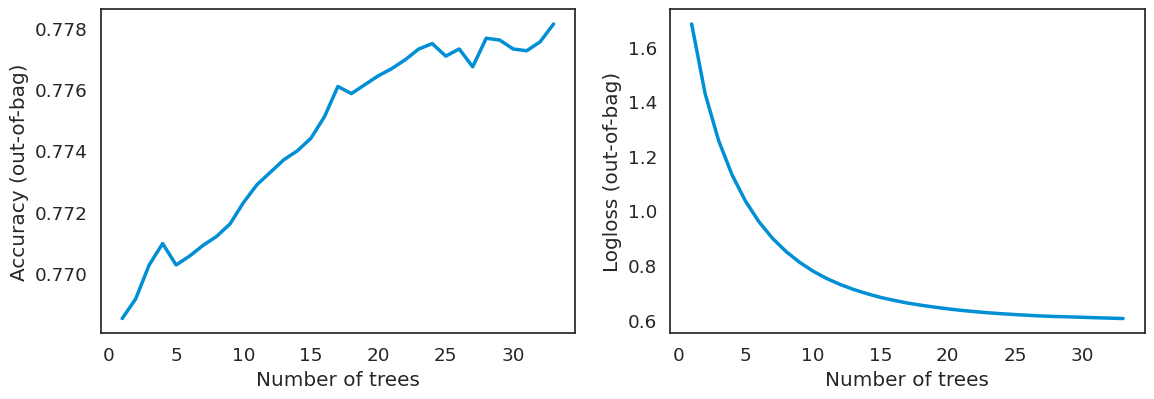

In [ ]:
# GBT graph
import matplotlib.pyplot as plt

  logs = model_1.make_inspector().training_logs()

  plt.figure(figsize=(12, 4))

  plt.subplot(1, 2, 1)
  plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
  plt.xlabel("Number of trees")
  plt.ylabel("Accuracy (out-of-bag)")

  plt.subplot(1, 2, 2)
  plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
  plt.xlabel("Number of trees")
  plt.ylabel("Logloss (out-of-bag)")

  plt.show()



### Random Forest Model
Random forest models train multiple trees at once. These trees are forced to pick from a random subset of features which diversifies them. Together, the trees create a forest that is collectively more stable and potentially more accurate than the rest of the trees. A major disadvantage of random forest models is that they take a long time to train. We trained our random forest model on a subset (~20%) of the training data.


In [ ]:
# Random forest
model_2 = tfdf.keras.RandomForestModel(verbose=1)

# Train the model.
model_2.fit(ds_train2)

Use /tmp/tmpkwo9_jvm as temporary training directory
Reading training dataset...
Training dataset read in 0:00:03.866210. Found 11681 examples.
Training model...
Model trained in 0:05:37.465231
Compiling model...
Model compiled.


In [ ]:
# Random forest analytics
print("model summary")
model_2.summary()

print("input features")
model_2.make_inspector().features()

print("feature importance")
model_2.make_inspector().variable_importances()

print("training logs")
model_2.make_inspector().training_logs()

y_pred = model_2.predict(ds_test2)

model_2.compile(metrics=["accuracy"])
evaluation = model_2.evaluate(ds_test2, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")



 # Convert the predicted probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)
y_true = [y for x, y in ds_test2]
y_true = tf.concat(y_true, axis=0).numpy()
f1 = f1_score(y_true, y_pred, average="weighted")
print("F1 score:", f1)

model summary
Model: "random_forest_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (21):
	AIRLINE
	AWND
	DAY
	DAY_OF_WEEK
	DESTINATION_AIRPORT
	DISTANCE
	FLIGHT_NUMBER
	MONTH
	ORIGIN_AIRPORT
	PRCP
	SCHEDULED_ARRIVAL
	SCHEDULED_DEPARTURE
	SCHEDULED_TIME
	SNOW
	SNWD
	TAIL_NUMBER
	TAVG
	TMAX
	TMIN
	Unnamed:_0
	YEAR

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1. "DESTINATION_AIRPORT"  0.235271 ################
    2.                "PRCP"  0.204439 ############
    3.                "SNOW"  0.137229 #####
    4.         "TAIL_NUMBER"  0.136504 #####
    5.                "TMAX"  0.135103 #####
    6.   "SCHEDULED_ARRIVAL"  0.120729 ###
    7.          

In [ ]:
# Random forest tree plot
tfdf.model_plotter.plot_model_in_colab(model_2, tree_idx=0, max_depth=3)

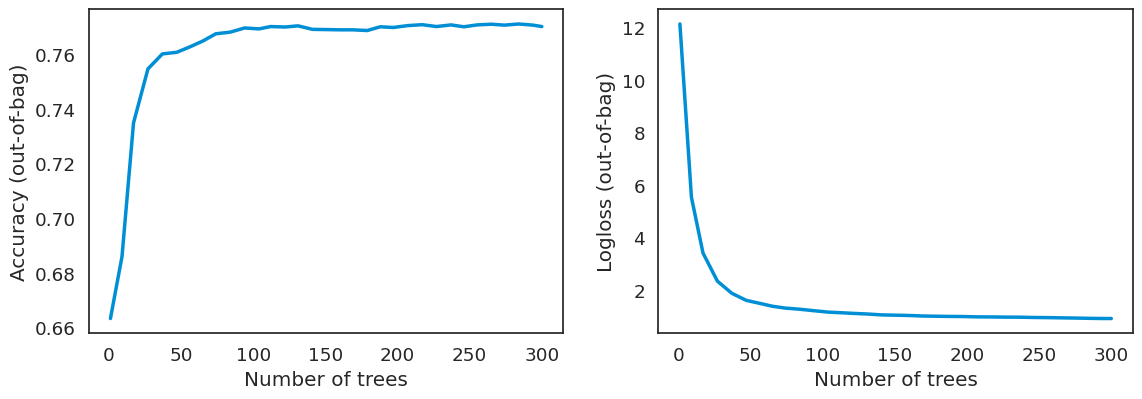

In [ ]:
# Random forest Graph

logs = model_2.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()

###KNN Model With Hyperparameter Tuning

Text(0, 0.5, 'Accuracy Score')

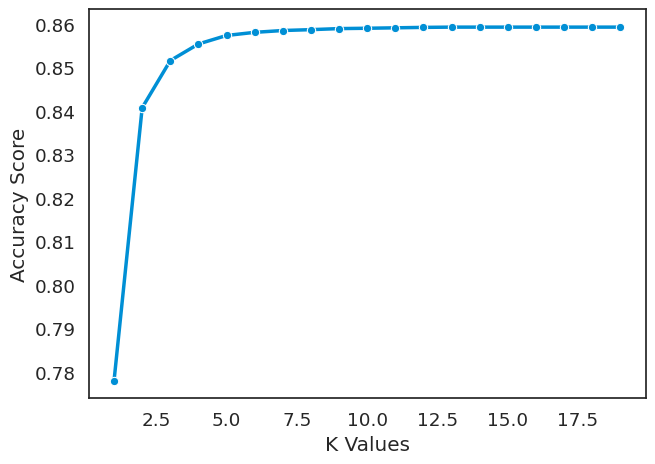

In [ ]:
# knn model
    # HYPER PARAMETER TUNING FOR THE k VALUE

k_values = [i for i in range (1,20)]
scores = []
#df.drop(["WEATHER_DELAY"], axis="columns")

# REDUCIING SAMPLE SIZE SO TREE TAKES LESS PROCESSING POWER
Xf = df.sample(n=50000)
Xf = Xf.dropna()
Xf = Xf.reset_index(drop = True)
X = Xf.drop(["WEATHER_DELAY"], axis="columns")
y = Xf["WEATHER_DELAY"]


scaler = StandardScaler()
X = scaler.fit_transform(X)


for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")





###Optimal KNN Model

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
score = cross_val_score(knn, X, y, cv=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
# Convert the predicted probabilities to class labels


accuracy = accuracy_score(y_test, y_pred)
print("accuracy score", accuracy)
# Compute the F1 score for the test set
f1 = f1_score(y_test, y_pred, average='weighted')
print("f1 score", f1)

accuracy score 0.855846396159904
f1 score 0.7967631855374501


# Testing Nueral Network Model Using Pytorch

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

def classify_delays(dt):
    if dt < 1:
        return 0
    elif dt < 4:
        return 1
    elif dt < 11:
        return 2
    elif dt < 17:
        return 3
    elif dt < 25:
        return 4
    elif dt < 37:
        return 5
    elif dt < 59:
        return 6
    elif dt < 130:
        return 7
    else:
        return 8

df3["WEATHER_DELAY"] = df3["WEATHER_DELAY"].map(classify_delays)

# One-hot encode categorical variables
categorical_features = ["DESTINATION_AIRPORT", "AIRLINE"]
onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
categorical_encoded = onehot_encoder.fit_transform(df3[categorical_features])

# Scale numerical features
numerical_features = df3.drop(columns=["WEATHER_DELAY"] + categorical_features)
scaler = StandardScaler()
numerical_scaled = scaler.fit_transform(numerical_features)

# Combine processed features
X = np.hstack((numerical_scaled, categorical_encoded))
y = df3["WEATHER_DELAY"].values
X = np.nan_to_num(X)
y = np.nan_to_num(y)
# Convert to PyTorch tensors
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

def to_tensor(data, target):
    return torch.tensor(data, dtype=torch.float32), torch.tensor(target, dtype=torch.long)

train_dataset = TensorDataset(*to_tensor(X_train, y_train))
val_dataset = TensorDataset(*to_tensor(X_val, y_val))
test_dataset = TensorDataset(*to_tensor(X_test, y_test))

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)
test_loader = DataLoader(test_dataset, batch_size=64)

# Define the neural network
class FlightDelayNN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(FlightDelayNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, output_dim)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.dropout(x)
        x = self.fc4(x)
        return x

# Initialize model
input_dim = X.shape[1]
output_dim = 9  # 9 classes for delay classification
model = FlightDelayNN(input_dim, output_dim)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Training loop
def train_model(model, train_loader, val_loader, epochs=10):
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # Validation
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}, Validation Accuracy: {100 * correct/total:.2f}%")

# Train the model
train_model(model, train_loader, val_loader, epochs=15)

# Evaluate on test set
def evaluate_model(model, test_loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f"Test Accuracy: {100 * correct/total:.2f}%")

evaluate_model(model, test_loader)

# Save the trained model
torch.save(model.state_dict(), "flight_delay_model.pth")
print("Model saved successfully!")


Epoch 1/15, Loss: 0.5101, Validation Accuracy: 80.37%
Epoch 2/15, Loss: 0.4770, Validation Accuracy: 80.36%
Epoch 3/15, Loss: 0.4724, Validation Accuracy: 80.60%
Epoch 4/15, Loss: 0.4697, Validation Accuracy: 80.49%
Epoch 5/15, Loss: 0.4675, Validation Accuracy: 80.63%
Epoch 6/15, Loss: 0.4652, Validation Accuracy: 80.67%
Epoch 7/15, Loss: 0.4640, Validation Accuracy: 80.71%
Epoch 8/15, Loss: 0.4620, Validation Accuracy: 80.73%
Epoch 9/15, Loss: 0.4612, Validation Accuracy: 80.67%
Epoch 10/15, Loss: 0.4601, Validation Accuracy: 80.78%
Epoch 11/15, Loss: 0.4582, Validation Accuracy: 80.88%
Epoch 12/15, Loss: 0.4573, Validation Accuracy: 80.86%
Epoch 13/15, Loss: 0.4566, Validation Accuracy: 81.01%
Epoch 14/15, Loss: 0.4548, Validation Accuracy: 80.95%
Epoch 15/15, Loss: 0.4539, Validation Accuracy: 80.98%
Test Accuracy: 80.37%
Model saved successfully!
